<a href="https://colab.research.google.com/github/WahyuKhairi06/DeepLearning-WahyuKhairi-2311531009/blob/main/Praktikum%207/Autoencoder_Praktikum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


In [2]:
# 1. Load dataset MNIST
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)


100%|██████████| 9.91M/9.91M [00:00<00:00, 37.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.01MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 10.1MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.48MB/s]


In [3]:
# 2. Definisikan model Autoencoder
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3)
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)


In [4]:
# 3. Training loop
epochs = 10
for epoch in range(epochs):
    for data, _ in trainloader:
        img = data.view(data.size(0), -1)
        output = model(img)
        loss = criterion(output, img)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [1/10], Loss: 0.0536
Epoch [2/10], Loss: 0.0469
Epoch [3/10], Loss: 0.0437
Epoch [4/10], Loss: 0.0375
Epoch [5/10], Loss: 0.0388
Epoch [6/10], Loss: 0.0357
Epoch [7/10], Loss: 0.0362
Epoch [8/10], Loss: 0.0362
Epoch [9/10], Loss: 0.0348
Epoch [10/10], Loss: 0.0364


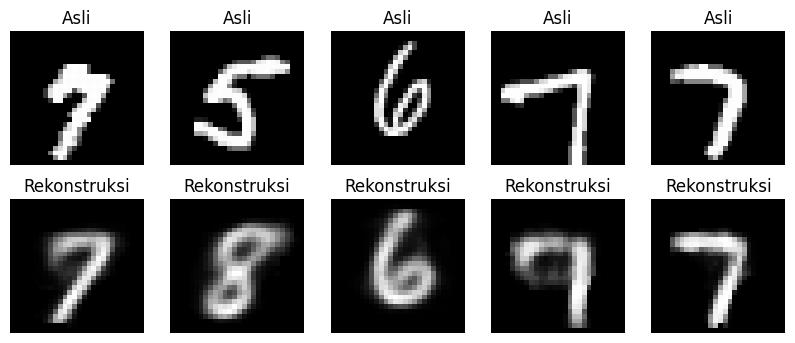

In [5]:
# 4. Visualisasi hasil rekonstruksi
with torch.no_grad():
    sample = next(iter(trainloader))[0][:5].view(-1, 28*28)
    reconstructed = model(sample)

    sample = sample.view(-1, 1, 28, 28)
    reconstructed = reconstructed.view(-1, 1, 28, 28)

    fig, axes = plt.subplots(2, 5, figsize=(10,4))
    for i in range(5):
        axes[0, i].imshow(sample[i].squeeze(), cmap='gray')
        axes[0, i].set_title("Asli")
        axes[0, i].axis('off')
        axes[1, i].imshow(reconstructed[i].squeeze(), cmap='gray')
        axes[1, i].set_title("Rekonstruksi")
        axes[1, i].axis('off')
    plt.show()
